# Data 


In [ ]:
# import libraries


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) 

In [2]:
#read in the data
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# Data Cleaning

In [5]:
# missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing))


Name - 0.00011962437944853162%
Platform - 0.0%
Year_of_Release - 0.0160894790358275%
Genre - 0.00011962437944853162%
Publisher - 0.0032298582451103534%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%
Critic_Score - 0.5133082122136492%
Critic_Count - 0.5133082122136492%
User_Score - 0.5460254799928226%
User_Count - 0.5460254799928226%
Developer - 0.3961361325438124%
Rating - 0.40486871224355525%


In [6]:
# Data types
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
df.corr()

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.267851,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


<Axes: >

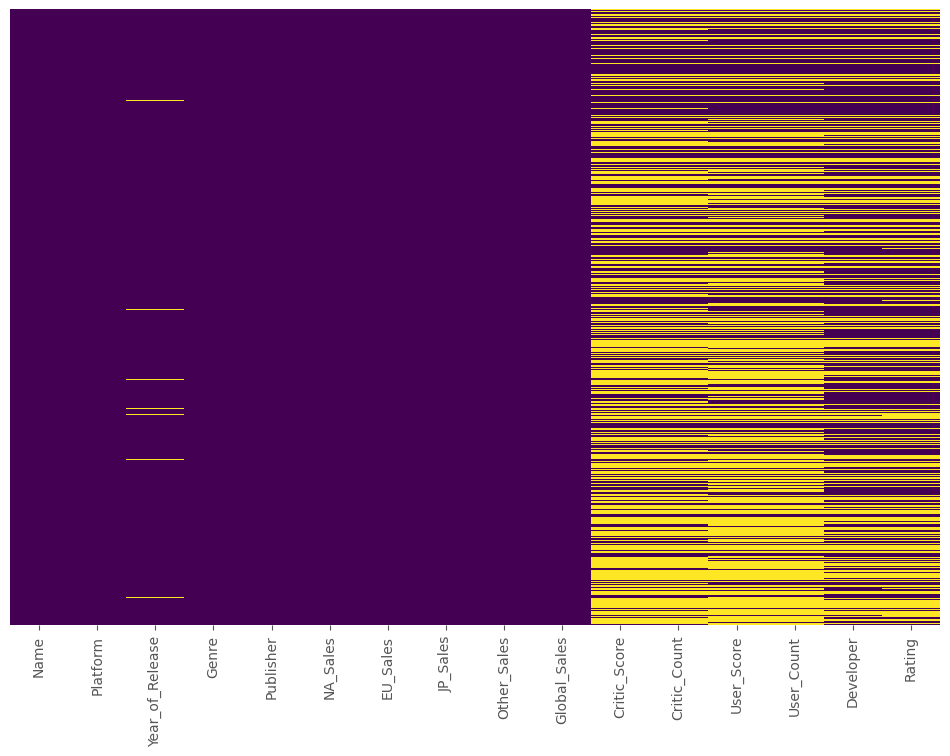

In [8]:
sns.heatmap(df.isnull() , yticklabels = False ,  cbar=False , cmap = "viridis")

In [9]:
df.keys()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [10]:
df.drop(['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'] , inplace=True, axis =  1  )

In [11]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.dropna(inplace= True)

<Axes: >

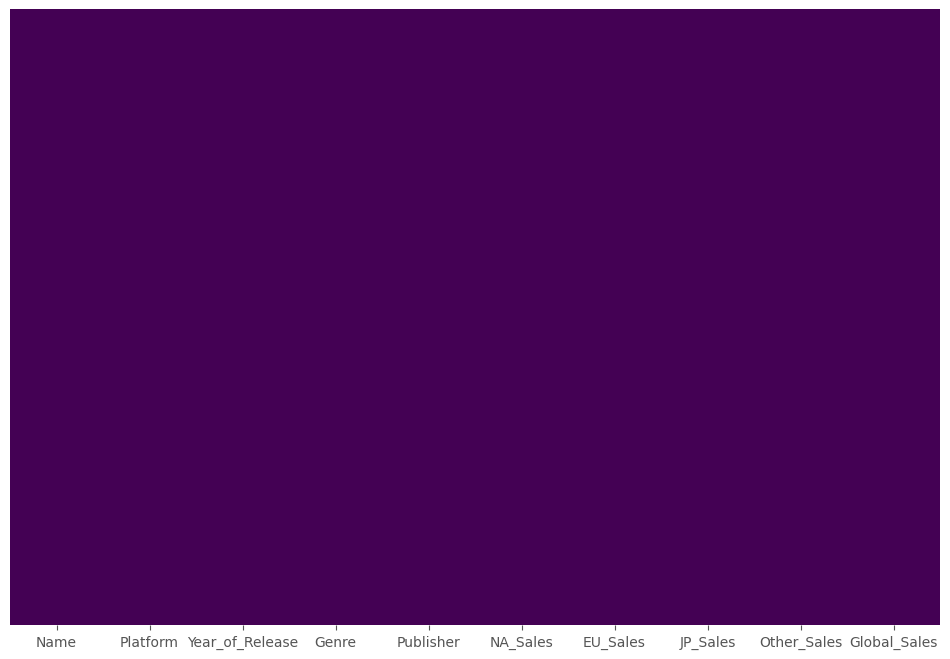

In [13]:
sns.heatmap(df.isnull() , yticklabels = False ,  cbar=False , cmap = "viridis")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  int64  
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [17]:
df["Genre"].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [18]:
df["Publisher"].value_counts()

Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
                                ... 
Max Five                           1
Bomb                               1
Detn8 Games                        1
American Softworks                 1
Red Flagship                       1
Name: Publisher, Length: 580, dtype: int64

# Exploratory data analysis


In [19]:
df.corr()

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


In [20]:
df.corr(method = "pearson")

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\3025111369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "pearson")


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


In [21]:
df.corr(method = "spearman")

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\636568451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "spearman")


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.136953,-0.064715,0.009221,0.046569,-0.160595
NA_Sales,-0.136953,1.000000,0.680852,-0.228785,0.781203,0.794212
EU_Sales,-0.064715,0.680852,1.000000,-0.174666,0.756454,0.693224
JP_Sales,0.009221,-0.228785,-0.174666,1.000000,-0.065871,0.156298
Other_Sales,0.046569,0.781203,0.756454,-0.065871,1.000000,0.814380
Global_Sales,-0.160595,0.794212,0.693224,0.156298,0.814380,1.000000


In [22]:
df.corr(method = "kendall")

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\3593226891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "kendall")


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.097670,-0.052656,0.013462,0.034920,-0.112265
NA_Sales,-0.097670,1.000000,0.556773,-0.181383,0.653059,0.675079
EU_Sales,-0.052656,0.556773,1.000000,-0.141097,0.652338,0.559080
JP_Sales,0.013462,-0.181383,-0.141097,1.000000,-0.055577,0.130068
Other_Sales,0.034920,0.653059,0.652338,-0.055577,1.000000,0.689828
Global_Sales,-0.112265,0.675079,0.559080,0.130068,0.689828,1.000000


C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\4231244810.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = "pearson") , annot =True ,cmap="viridis" , linecolor="white" , linewidths= 1)


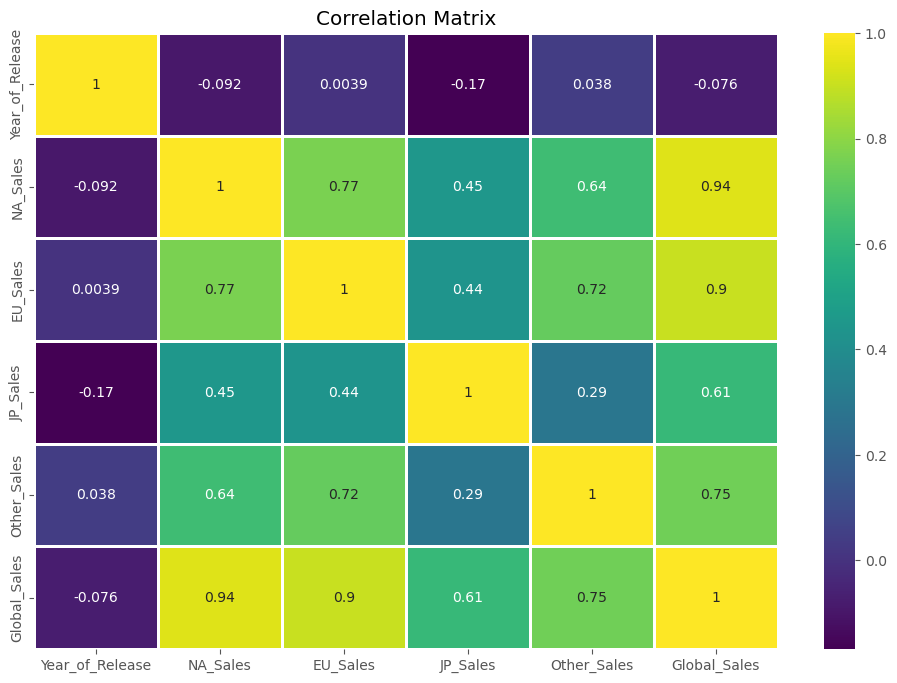

In [23]:
sns.heatmap(df.corr(method = "pearson") , annot =True ,cmap="viridis" , linecolor="white" , linewidths= 1)
plt.title("Correlation Matrix")

plt.show()

In [24]:
sorted_corr = df.corr().unstack().sort_values()

sorted_corr[(sorted_corr) > 0.6]

C:\Users\niloo\AppData\Local\Temp\ipykernel_1624\1270002244.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().unstack().sort_values()


Global_Sales     JP_Sales           0.613305
JP_Sales         Global_Sales       0.613305
Other_Sales      NA_Sales           0.638502
NA_Sales         Other_Sales        0.638502
EU_Sales         Other_Sales        0.722679
Other_Sales      EU_Sales           0.722679
Global_Sales     Other_Sales        0.748907
Other_Sales      Global_Sales       0.748907
EU_Sales         NA_Sales           0.766539
NA_Sales         EU_Sales           0.766539
EU_Sales         Global_Sales       0.901665
Global_Sales     EU_Sales           0.901665
NA_Sales         Global_Sales       0.941238
Global_Sales     NA_Sales           0.941238
Year_of_Release  Year_of_Release    1.000000
JP_Sales         JP_Sales           1.000000
EU_Sales         EU_Sales           1.000000
NA_Sales         NA_Sales           1.000000
Other_Sales      Other_Sales        1.000000
Global_Sales     Global_Sales       1.000000
dtype: float64

In [25]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


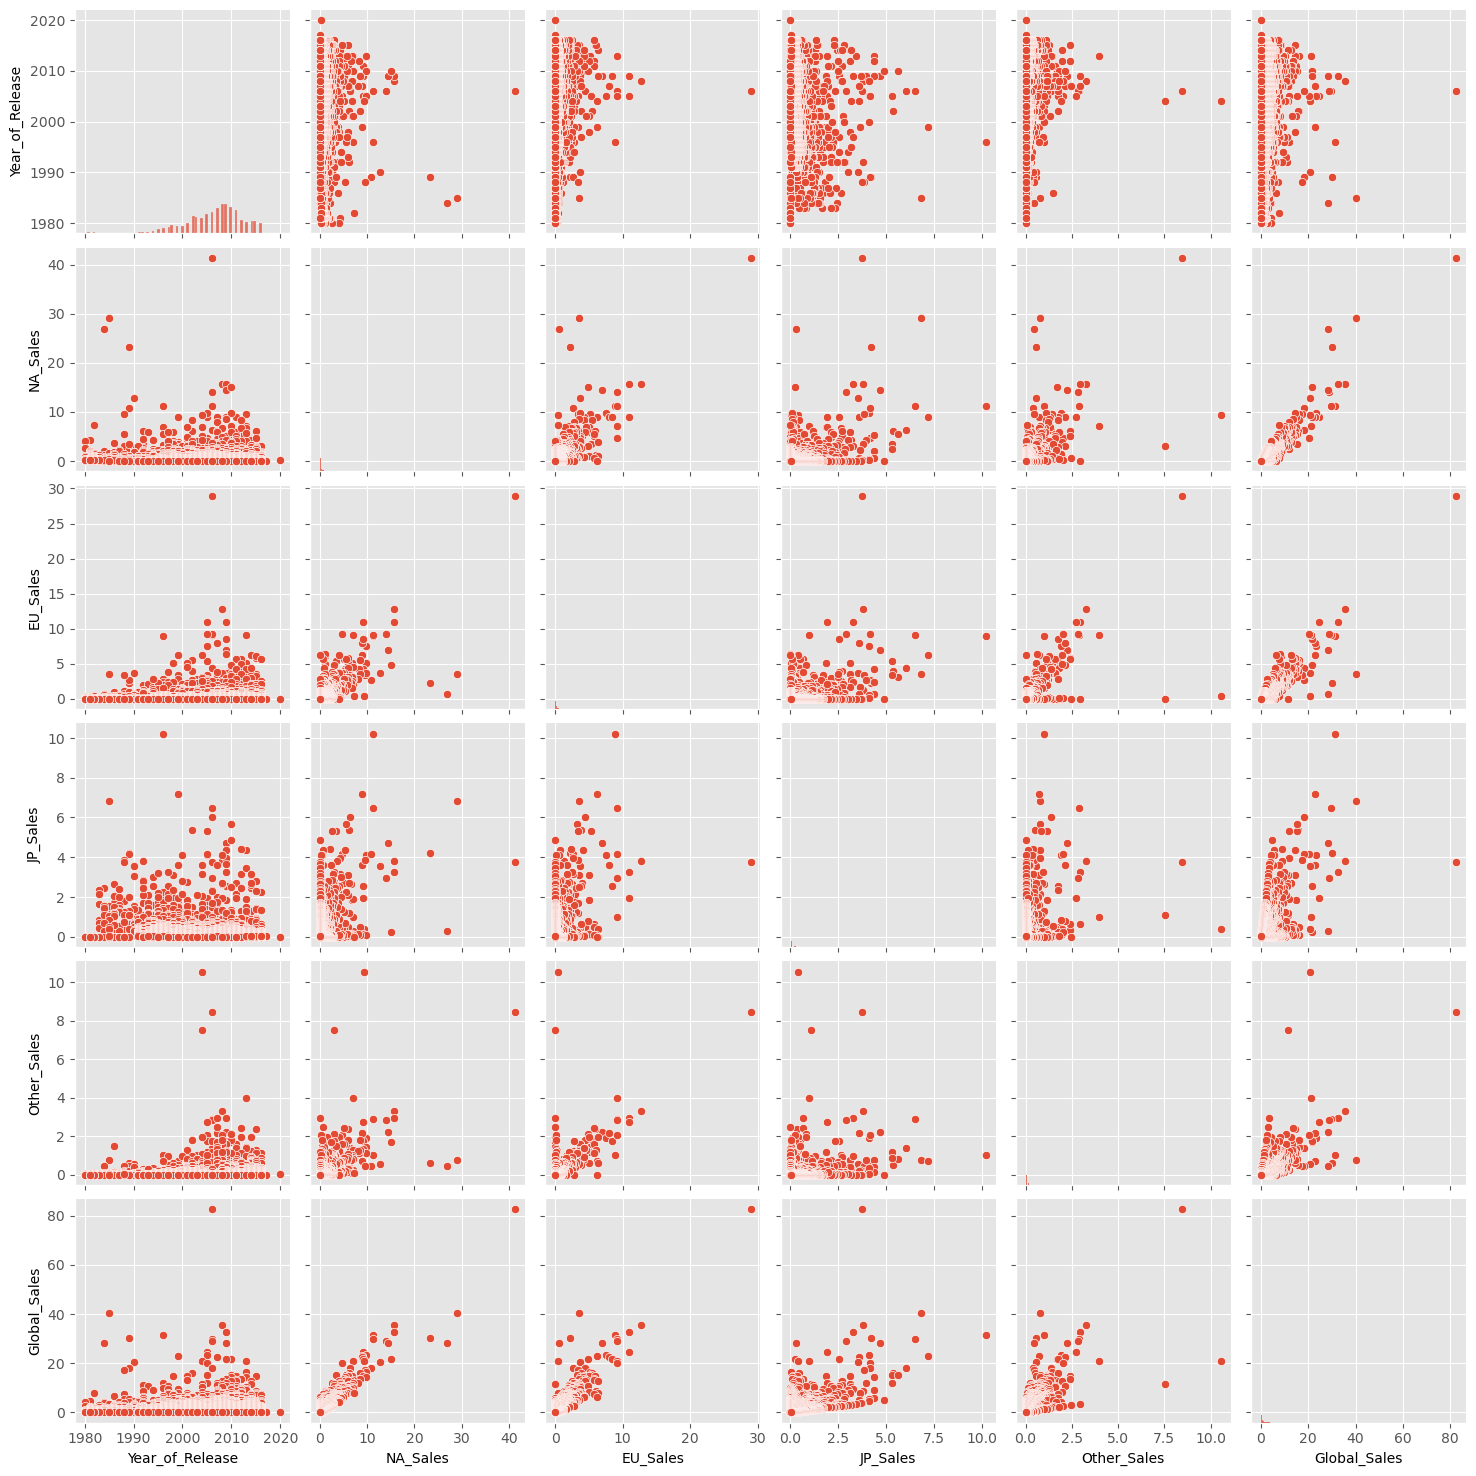

In [27]:
sns.pairplot(df)

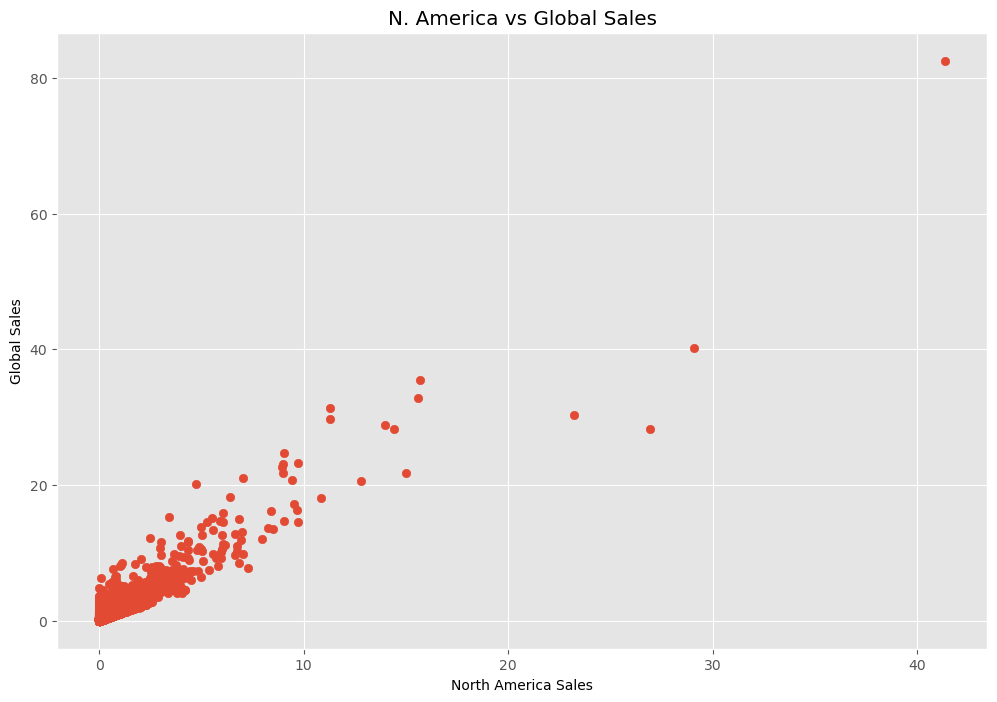

In [26]:
plt.scatter(x= df["NA_Sales"] , y =df["Global_Sales"] )
plt.title("N. America vs Global Sales")
plt.xlabel("North America Sales")
plt.ylabel("Global Sales")
plt.show()

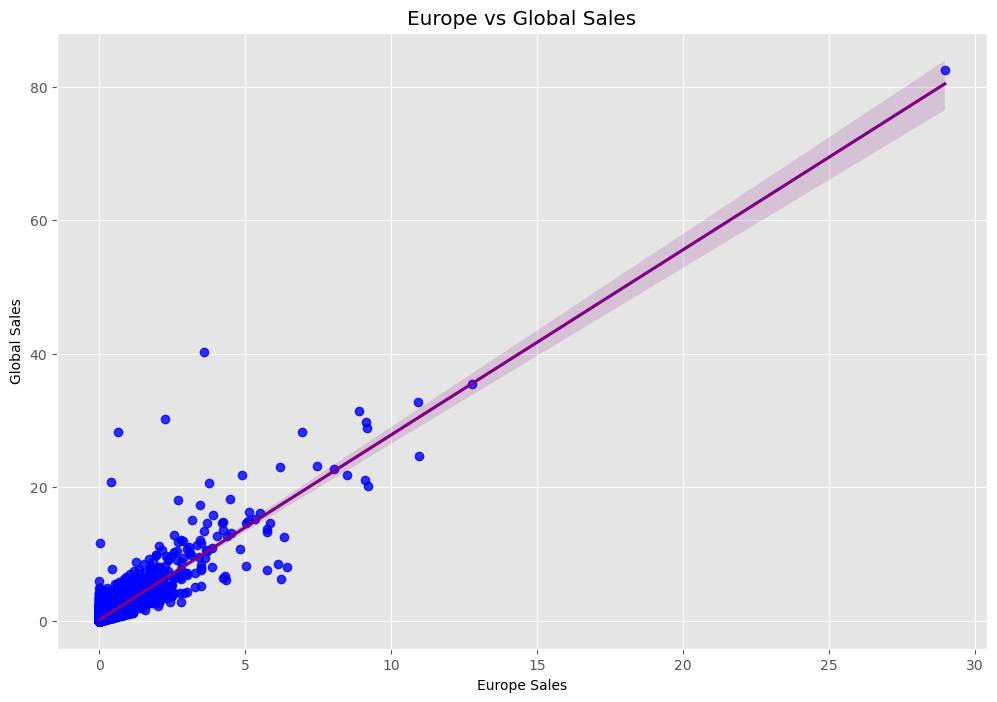

In [27]:
sns.regplot(x= "EU_Sales", y ="Global_Sales" , data = df , scatter_kws = {"color" : "blue"} , line_kws = {"color" : "purple"} )
plt.title("Europe vs Global Sales")
plt.xlabel("Europe Sales")
plt.ylabel("Global Sales")
plt.show()

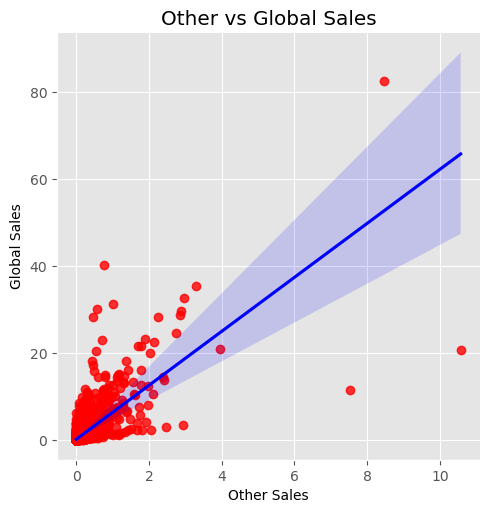

In [28]:
sns.lmplot(x= "Other_Sales", y ="Global_Sales" , data = df 
           ,markers = "o" ,scatter_kws = {"color" : "red"} , line_kws = {"color" : "blue"} )

plt.title("Other vs Global Sales")
plt.xlabel("Other Sales")
plt.ylabel("Global Sales")
plt.show()

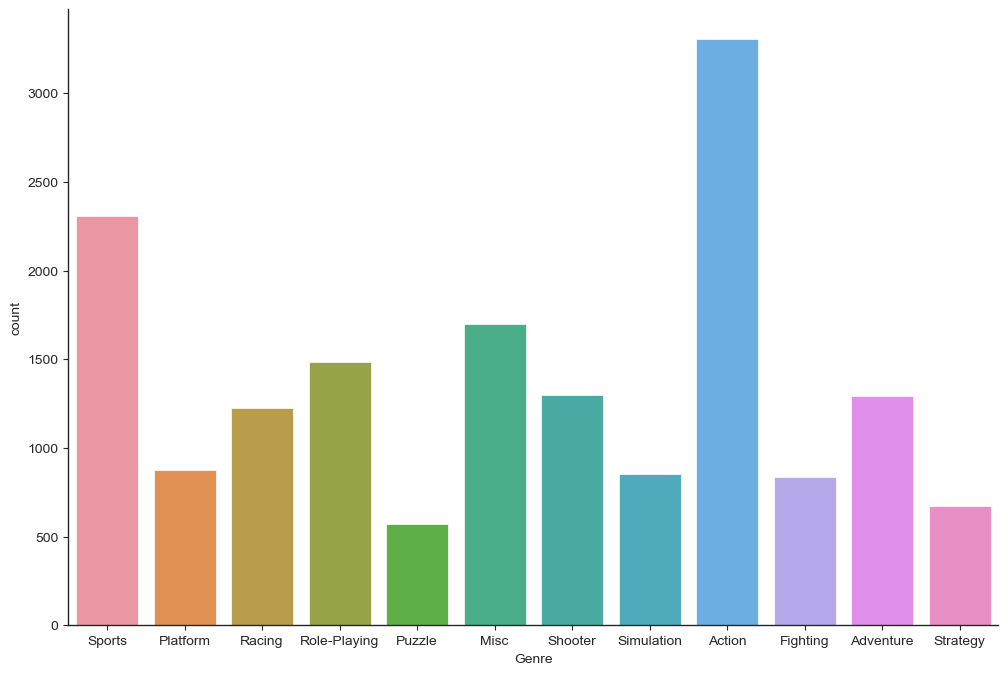

In [29]:
sns.set_style("ticks")
sns.countplot(x="Genre" , data=df)
sns.despine()

# Training and Testing Data


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.keys()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train , y_train)

LinearRegression()

In [37]:
pred_lin= lm.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
print("MAE :" ,metrics.mean_absolute_error(y_test , pred_lin))

metrics.mean_squared_error(y_test, pred_lin)
print("MSE :" ,metrics.mean_squared_error(y_test, pred_lin))

np.sqrt(metrics.mean_squared_error(y_test, pred_lin))
print("RMSE :" ,np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))

MAE : 0.002865316640368112
MSE : 2.6885358409653563e-05
RMSE : 0.005185109295825264


## Logestic Regression

In [40]:
df["Genre Code"] = df["Genre"].astype("category")
df["Genre Code"] = df["Genre Code"].cat.codes

In [41]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre Code
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,10
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,6
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7


In [42]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df["Genre Code"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train , y_train)

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred_log = log_model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, pred_log))
print("\n")
print(confusion_matrix(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.21      0.97      0.35      1016
           1       0.00      0.00      0.00       374
           2       0.00      0.00      0.00       249
           3       0.00      0.00      0.00       515
           4       0.33      0.01      0.02       254
           5       0.00      0.00      0.00       171
           6       0.00      0.00      0.00       366
           7       0.29      0.14      0.19       420
           8       0.32      0.02      0.03       393
           9       0.00      0.00      0.00       252
          10       0.12      0.00      0.00       703
          11       0.00      0.00      0.00       212

    accuracy                           0.21      4925
   macro avg       0.11      0.10      0.05      4925
weighted avg       0.13      0.21      0.09      4925



[[990   0   0   0   0   0   3  18   3   0   2   0]
 [368   0   0   0   0   0   0   6   0   0   0   0]
 [229   0   0   0   3   0   0

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
pd.DataFrame(df["Genre" ].unique() , df["Genre Code" ].unique())

,0
10,Sports
4,Platform
6,Racing
7,Role-Playing
5,Puzzle
3,Misc
8,Shooter
9,Simulation
0,Action
2,Fighting


## K - Neareast Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df["Genre Code"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
pred_knn = knn.predict(X_test)

In [57]:
print(classification_report(y_test, pred_knn))
print("\n")
print(confusion_matrix(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.24      0.22      0.23      1016
           1       0.17      0.16      0.17       374
           2       0.05      0.06      0.06       249
           3       0.16      0.16      0.16       515
           4       0.09      0.08      0.09       254
           5       0.05      0.05      0.05       171
           6       0.07      0.06      0.06       366
           7       0.14      0.18      0.16       420
           8       0.13      0.12      0.12       393
           9       0.07      0.07      0.07       252
          10       0.20      0.23      0.21       703
          11       0.09      0.05      0.07       212

    accuracy                           0.15      4925
   macro avg       0.12      0.12      0.12      4925
weighted avg       0.15      0.15      0.15      4925



[[225  79  64  99  44  32  78 106  86  46 131  26]
 [ 45  60  25  37  13  10  17  64  16  13  68   6]
 [ 50  19  16  24  11  12  19

## Elbow method


In [58]:
error = []
for i in range (1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pre_i = knn.predict(X_test)
    error.append(np.mean(pre_i != y_test))

Text(0, 0.5, 'Error Rate')

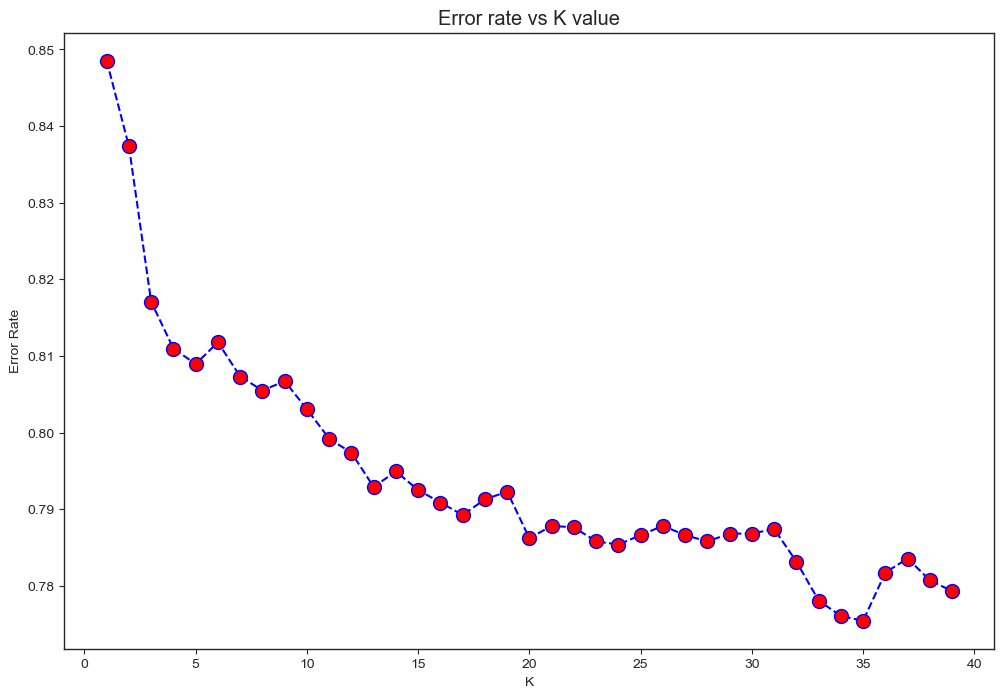

In [59]:
plt.figure()

plt.plot(range(1, 40) , error , color = "blue" , linestyle = "--" , marker = "o" , markerfacecolor = "red" , markersize= 10)

plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [60]:
knn20 = KNeighborsClassifier(n_neighbors= 20)

knn20.fit(X_train,y_train)
pred = knn20.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[505  75   4  89  22  11  47  74  63  13 107   6]
 [137 114   2  34  10   4   8  23  10   7  24   1]
 [113  17   9  19   3   3  11  38   9   0  27   0]
 [216  53   3  59   7   9  16  35  16  11  89   1]
 [127   6   3  23  15   4  20  19   8   2  27   0]
 [ 73   5   0  25   8   8   1  14  14   5  18   0]
 [199  11   5  22  13   2  24   6  22   4  55   3]
 [147  46   3  29   9   2   9 114   9   4  46   2]
 [220  10   4  21  16   6  19  20  27   3  46   1]
 [108  17   3  23   3   6   8  25   7   8  43   1]
 [298  19   7  64  16  11  40  35  28  14 166   5]
 [ 92  27   4  16   5   2   6  21   8   6  21   4]]


              precision    recall  f1-score   support

           0       0.23      0.50      0.31      1016
           1       0.28      0.30      0.29       374
           2       0.19      0.04      0.06       249
           3       0.14      0.11      0.13       515
           4       0.12      0.06      0.08       254
           5       0.12      0.05      0.07     

In [72]:
knn35 = KNeighborsClassifier(n_neighbors= 35)

knn35.fit(X_train,y_train)
pred = knn35.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[545  86   5  59  11  13  25  81  43   9 135   4]
 [129 125   1  26   6   5   8  27  11   3  32   1]
 [118  20   7  15   3   3   4  42   7   0  29   1]
 [203  59   2  61   6   9   8  44  13   7 102   1]
 [134   7   1  12  11   4  12  19   9   0  44   1]
 [ 65   7   1  29   4   8   4  16  14   4  19   0]
 [204  12   3  19   7   2  14  10  20   3  70   2]
 [129  54   1  26   9   2   7 119   8   4  61   0]
 [217  10   1  25  14   8  12  20  27   1  57   1]
 [101  18   1  19   1   6   7  30  10   5  54   0]
 [311  28   7  66   7  10  12  46  26   7 182   1]
 [ 92  26   1   8   3   2   7  27   6   6  32   2]]


              precision    recall  f1-score   support

           0       0.24      0.54      0.33      1016
           1       0.28      0.33      0.30       374
           2       0.23      0.03      0.05       249
           3       0.17      0.12      0.14       515
           4       0.13      0.04      0.07       254
           5       0.11      0.05      0.07     

## K-means Clustering

In [61]:
from sklearn.cluster import KMeans

In [62]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df["Genre Code"]

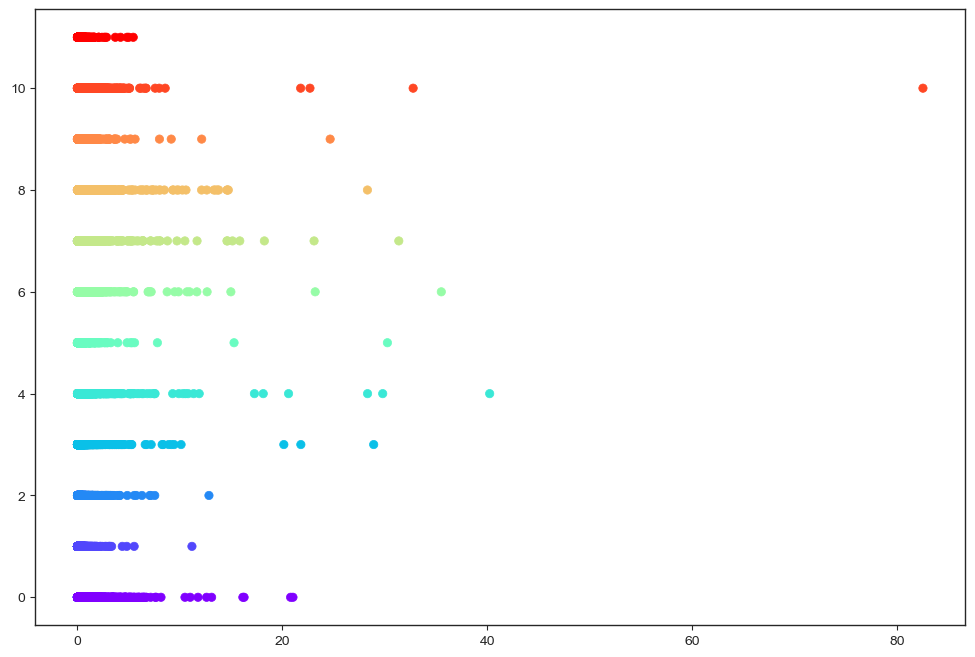

In [63]:
plt.scatter(X['Global_Sales'] , y , c=y ,cmap='rainbow')

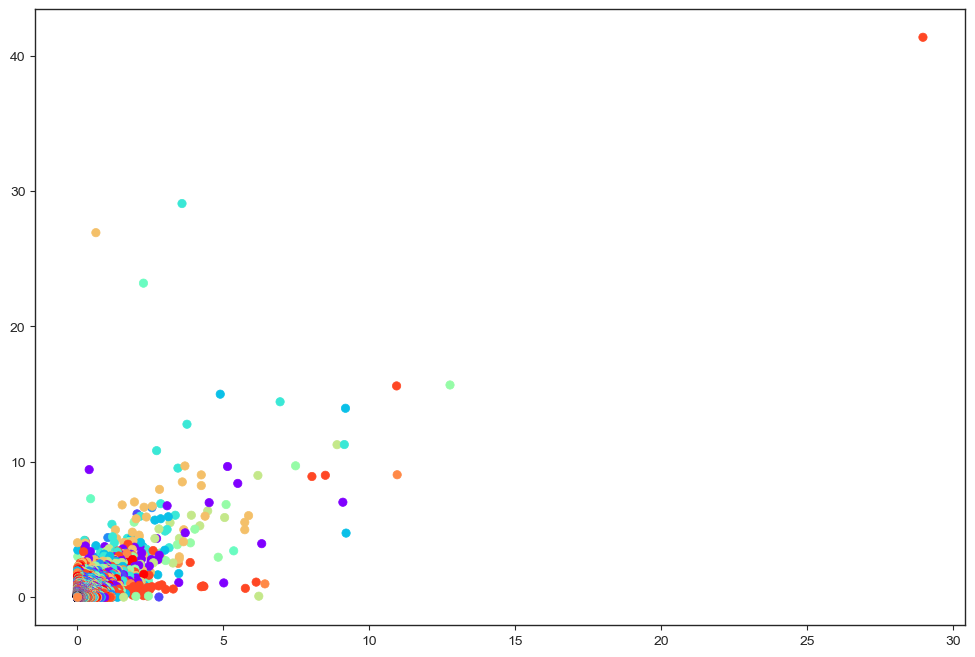

In [97]:
plt.scatter(X['EU_Sales'] , X['NA_Sales'] , c=y ,cmap='rainbow')

In [64]:
kmeans= KMeans(n_clusters= 11)

In [65]:
kmeans.fit(X)

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11)

In [66]:
kmeans.cluster_centers_

array([[5.34954161e-02, 2.33749775e-02, 3.06201690e-02, 7.56066870e-03,
        1.15462880e-01],
       [9.29866667e+00, 5.97933333e+00, 2.88733333e+00, 2.23400000e+00,
        2.03986667e+01],
       [2.09252101e+00, 1.35016807e+00, 4.85126050e-01, 4.14915966e-01,
        4.34226891e+00],
       [4.13600000e+01, 2.89600000e+01, 3.77000000e+00, 8.45000000e+00,
        8.25300000e+01],
       [2.64033333e+01, 2.15666667e+00, 3.77000000e+00, 6.06666667e-01,
        3.29366667e+01],
       [6.69493270e-01, 3.73436263e-01, 1.52549485e-01, 1.23388757e-01,
        1.31879652e+00],
       [5.72116279e+00, 3.54488372e+00, 1.66232558e+00, 1.18116279e+00,
        1.21095349e+01],
       [3.27530120e+00, 2.42421687e+00, 8.74698795e-01, 6.49518072e-01,
        7.22433735e+00],
       [2.83934059e-01, 1.47592830e-01, 7.94558259e-02, 5.15044814e-02,
        5.62464789e-01],
       [1.26459144e+00, 6.74221790e-01, 3.10797665e-01, 2.32023346e-01,
        2.48126459e+00],
       [1.37066667e+01, 9.6400

In [67]:
print(confusion_matrix(df["Genre Code"] , kmeans.labels_))
print("\n")
print(classification_report(df["Genre Code"], kmeans.labels_))

[[2166    4   58    0    0  256    5   16  702  100    0    0]
 [1148    0    4    0    0   25    1    0  105    8    0    0]
 [ 544    0   10    0    0   79    1    4  166   33    0    0]
 [1221    2   21    0    0  101    2    7  298   44    1    0]
 [ 492    3   25    0    1  113    6   10  183   43    2    0]
 [ 445    0    5    0    1   32    1    1   70   14    0    0]
 [ 793    1   13    0    0  119    6    6  239   47    1    0]
 [1015    2   24    0    0  105    6   13  264   53    1    0]
 [ 740    0   34    0    1  140   14   16  294   57    0    0]
 [ 587    1    9    0    0   58    1    2  174   23    0    0]
 [1423    2   29    1    0  214    0    8  545   83    1    0]
 [ 556    0    5    0    0   21    0    0   83    7    0    0]]


              precision    recall  f1-score   support

           0       0.19      0.65      0.30      3307
           1       0.00      0.00      0.00      1291
           2       0.04      0.01      0.02       837
           3       0.00 

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df["Genre"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
pred_tree = dtree.predict(X_test)

In [74]:
print(confusion_matrix(y_test , pred_tree))
print("\n")
print(classification_report(y_test, pred_tree))

[[305 140  46 101  44  13  71  61  65  26 128  16]
 [ 82 152   7  27  11   3  18  23  11   4  35   1]
 [ 59  37  14  29  10   6  23  23  10  10  26   2]
 [142  77   7  77  17   8  23  41  20  24  75   4]
 [ 77  15  18  25  19   9  20  13  15   5  34   4]
 [ 52  12   6  32   2   4   8  15   3  13  22   2]
 [131  25  21  34  15   3  35  11  18   7  61   5]
 [ 97  82  19  32  16   7  16  79  10  14  38  10]
 [139  28  16  29  21  11  20  22  37   8  55   7]
 [ 75  24   7  33   6   5  17  18  10  18  35   4]
 [208  41  28  88  22   9  46  39  32  29 150  11]
 [ 65  36   8  17   6   1  10  15   5   8  33   8]]


              precision    recall  f1-score   support

      Action       0.21      0.30      0.25      1016
   Adventure       0.23      0.41      0.29       374
    Fighting       0.07      0.06      0.06       249
        Misc       0.15      0.15      0.15       515
    Platform       0.10      0.07      0.09       254
      Puzzle       0.05      0.02      0.03       171
      

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
pred_rfc = rfc.predict(X_test)

In [77]:
print(confusion_matrix(y_test , pred_rfc))
print("\n")
print(classification_report(y_test, pred_rfc))

[[332 117  32  83  30   8  64  68  80  25 152  25]
 [ 73 145   3  30   6   3  17  26  12   6  45   8]
 [ 63  32  10  28   9   7  17  32  13   4  31   3]
 [131  68   4  73  18  10  16  38  26  20 105   6]
 [ 79   9  12  21  18  10  22  15  18   5  42   3]
 [ 44  12   4  27   4   7   7  18   5  10  30   3]
 [117  18   9  26  13   5  37  12  32   8  84   5]
 [ 98  70   9  22  14   8  14 109  15   6  47   8]
 [130  16  10  32  22   7  27  27  42   5  67   8]
 [ 76  21   5  27   5   9  18  18  14  10  43   6]
 [188  32  16  73  18  14  39  49  32  32 195  15]
 [ 61  32   7  14   3   3  11  16   5   8  36  16]]


              precision    recall  f1-score   support

      Action       0.24      0.33      0.28      1016
   Adventure       0.25      0.39      0.31       374
    Fighting       0.08      0.04      0.05       249
        Misc       0.16      0.14      0.15       515
    Platform       0.11      0.07      0.09       254
      Puzzle       0.08      0.04      0.05       171
      

## PCA :Principle Component Analysis

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [79]:
scaler = StandardScaler()

In [80]:
z =df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales' , 'Genre Code']]
scaler.fit(z)

StandardScaler()

In [81]:
scaled_data= scaler.transform(z)

In [82]:
#Decomposing Data
pca= PCA(n_components= 2)

In [83]:
pca.fit(scaled_data)

PCA(n_components=2)

In [84]:
x_pca =pca.transform(scaled_data)

In [85]:
scaled_data.shape

(16416, 6)

In [86]:
x_pca.shape 

(16416, 2)

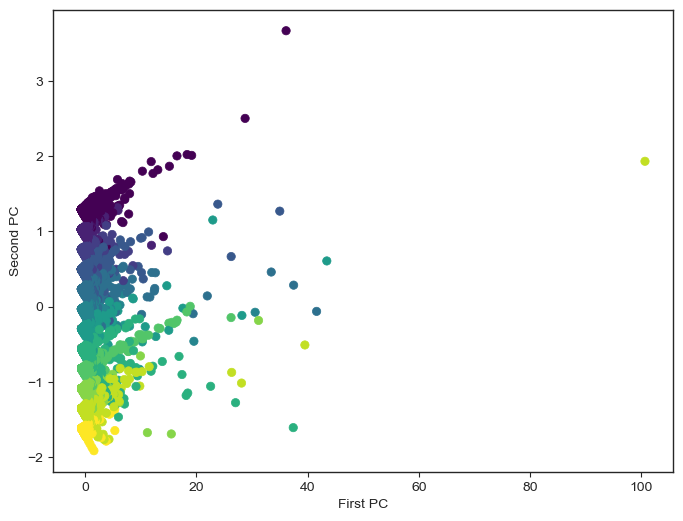

In [87]:
plt.figure(figsize= (8,6))
plt.scatter(x_pca[:, 0],x_pca[:,1] , cmap="viridis" , c= df['Genre Code'])
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

## Recommender System

In [88]:
df_i = df.copy()
df_i['Index'] = range(0, len(df))
df_i.set_index('Index', inplace= True)
df_i.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre Code
Index,,,,,,,,,,,
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,10
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,6
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7


In [89]:
genre_sale = pd.DataFrame(df_i.groupby('Genre')['Global_Sales'].mean())
genre_sale.head()

,Global_Sales
Genre,
Action,0.519389
Adventure,0.180674
Fighting,0.528829
Misc,0.461514
Platform,0.940615


In [90]:
genre_sale['Genre Count'] = pd.DataFrame(df_i.groupby('Genre')['Global_Sales'].count())
genre_sale.head()

,Global_Sales,Genre Count
Genre,,
Action,0.519389,3307
Adventure,0.180674,1291
Fighting,0.528829,837
Misc,0.461514,1697
Platform,0.940615,878


In [91]:
genre_pi = df_i.pivot_table(index = 'Index' , columns='Genre' , values = 'Global_Sales')
genre_pi.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Index,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.53,NaN
1,NaN,NaN,NaN,NaN,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,35.52,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.77,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.37,NaN,NaN,NaN,NaN


In [92]:
genre_pi.shape

(16416, 12)

In [93]:
genre_sale.sort_values('Global_Sales',ascending=False).head(10)

,Global_Sales,Genre Count
Genre,,
Platform,0.940615,878
Shooter,0.803881,1296
Role-Playing,0.627714,1483
Racing,0.590767,1225
Sports,0.568252,2306
Fighting,0.528829,837
Action,0.519389,3307
Misc,0.461514,1697
Simulation,0.454058,855


In [94]:
platform_sale = genre_pi["Platform"]
platform_sale.head()

Index
0      NaN
1    40.24
2      NaN
3      NaN
4      NaN
Name: Platform, dtype: float64

In [95]:
similar_to_p = genre_pi.corrwith(platform_sale)

In [96]:
corr_plat = pd.DataFrame(similar_to_p,columns=['Correlation'])
corr_plat.dropna(inplace=True)
corr_plat.head()

,Correlation
Genre,
Platform,1.0


##### Genre does not have good correlation , so this method wont help us.

# SVM - Support Vector Machine

In [97]:
X= df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y = df["Genre"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.svm import SVC

In [100]:
model = SVC()
model.fit(X_train , y_train)

SVC()

In [101]:
predictions_svm = model.predict(X_test)

In [102]:
print(classification_report(y_test, predictions_svm))
print("\n")
print(confusion_matrix(y_test, predictions_svm))

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Action       0.21      0.94      0.35      1016
   Adventure       0.00      0.00      0.00       374
    Fighting       0.00      0.00      0.00       249
        Misc       1.00      0.00      0.00       515
    Platform       0.14      0.00      0.01       254
      Puzzle       0.00      0.00      0.00       171
      Racing       0.00      0.00      0.00       366
Role-Playing       0.25      0.20      0.22       420
     Shooter       0.55      0.02      0.03       393
  Simulation       0.00      0.00      0.00       252
      Sports       0.35      0.04      0.07       703
    Strategy       0.00      0.00      0.00       212

    accuracy                           0.22      4925
   macro avg       0.21      0.10      0.06      4925
weighted avg       0.27      0.22      0.10      4925



[[952   0   0   0   1   0   0  52   1   0  10   0]
 [364   0   0   0   0   0   0  10   0   0   0   0]
 [218   0   0   0   3   0   0

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter_g = {"C" : [0.1 , 1, 10] , "gamma" :[1, 0.1 , 0.01 ]}

In [105]:
grid = GridSearchCV(SVC() , parameter_g , verbose = 2)

In [107]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=  24.3s
[CV] END .....................................C=0.1, gamma=1; total time=  24.1s
[CV] END .....................................C=0.1, gamma=1; total time=  24.4s
[CV] END .....................................C=0.1, gamma=1; total time=  23.8s
[CV] END .....................................C=0.1, gamma=1; total time=  24.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=  23.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  23.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  23.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  23.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=  23.9s
[CV] END ..................................C=0.1, gamma=0.01; total time=  23.6s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [109]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [110]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [111]:
grid.best_score_

0.22391473797023037

In [112]:
pred_g = grid.predict(X_test)

In [113]:
print(classification_report(y_test, pred_g))
print("\n")
print(confusion_matrix(y_test, pred_g))

              precision    recall  f1-score   support

      Action       0.22      0.87      0.35      1016
   Adventure       0.00      0.00      0.00       374
    Fighting       0.00      0.00      0.00       249
        Misc       0.23      0.01      0.03       515
    Platform       0.26      0.03      0.06       254
      Puzzle       0.00      0.00      0.00       171
      Racing       0.20      0.00      0.01       366
Role-Playing       0.25      0.33      0.28       420
     Shooter       0.23      0.02      0.03       393
  Simulation       0.20      0.00      0.01       252
      Sports       0.34      0.11      0.16       703
    Strategy       0.00      0.00      0.00       212

    accuracy                           0.23      4925
   macro avg       0.16      0.11      0.08      4925
weighted avg       0.20      0.23      0.13      4925



[[885   0   2   8   5   0   1  80   7   1  27   0]
 [339   0   0   0   0   0   0  31   0   0   4   0]
 [193   0   0   0   1   0   1

C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niloo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
